# Extract all the datasets that will be used

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
EP6 = pd.read_csv("/content/drive/MyDrive/ Thesis 2023/EP6_final.csv")
EP7 = pd.read_csv("/content/drive/MyDrive/ Thesis 2023/EP7_final.csv")
EP8 = pd.read_csv("/content/drive/MyDrive/ Thesis 2023/EP8_final.csv")


In [ ]:
EP6_acc = pd.read_csv("/content/drive/MyDrive/ Thesis 2023/EP6_accuracies2.csv")
EP7_acc = pd.read_csv("/content/drive/MyDrive/ Thesis 2023/EP7_accuracies2.csv")
EP8_acc = pd.read_csv("/content/drive/MyDrive/ Thesis 2023/EP8_accuracies2.csv")

In [ ]:
pd.set_option('display.max_columns', 28)

## Transpose the RCV data sets

In [ ]:
EP8_RCV.columns


Index(['Unnamed: 0', 'WebisteEpID', 'Fname', 'Lname', 'Activ', 'Country',
       'Party', 'EPG', 'Start', 'End',
       ...
       '10267', '10268', '10269', '10270', '10271', '10272', '10273', '10274',
       '10275', '10276'],
      dtype='object', length=10262)

In [ ]:
EP6.columns

Index(['Unnamed: 0', 'Unnamed: 0_x', 'euro_act_id', 'date', 'title_x',
       'procedure', 'reading', 'type_of_vote', 'url', 'committee_code',
       'main_policy_name', 'subject', 'final_vote', 'author_name', 'am_no',
       'result_code', 'yes', 'no', 'abstain', 'did_not_vote', 'absent',
       'absent_motivated', 'Unnamed: 0_y', 'link', 'raw_text', 'title_y',
       'Vote ID'],
      dtype='object')

In [ ]:
EP6 = EP6.drop("Vote ID", axis=1)

In [ ]:
EP6 = EP6.rename(columns = {"euro_act_id" : "Vote ID"})

In [ ]:
EP8_RCV.shape

(858, 10262)

In [ ]:
EP7_RCV.columns

Index(['Unnamed: 0', 'MEP ID', 'Fname', 'Lname', 'FullName', 'Country',
       'Party', 'EPG', 'Start', 'End',
       ...
       '6954', '6955', '6956', '6957', '6958', '6959', '6960', '6961', '6962',
       '6963'],
      dtype='object', length=6971)

In [ ]:
EP6_subset = EP6[EP6["final_vote"] == 1] #results in 409 missing in raw_text, the rest have no missings (EP7 and EP8)
EP7_subset = EP7[EP7["Final vote?"] == 1]
EP8_subset = EP8[EP8["Final \nvote?"] == 1]


In [ ]:
EP7_RCV.columns

Index(['Unnamed: 0', 'MEP ID', 'Fname', 'Lname', 'FullName', 'Country',
       'Party', 'EPG', 'Start', 'End',
       ...
       '6954', '6955', '6956', '6957', '6958', '6959', '6960', '6961', '6962',
       '6963'],
      dtype='object', length=6971)

In [ ]:
#EP6_final = EP6_subset[['Vote ID', 'raw_text','type_of_vote','main_policy_name','committee_code']]
EP7_final = EP7_subset[['Vote ID', 'raw_text','Type of Vote','Committee responsabile','De']]
EP8_final = EP8_subset[['Vote ID', 'raw_text','Type of Vote','Committee responsabile','De/Policy area']]

In [ ]:
EP7_RCV.drop([ "Fname", "Lname",  "Unnamed: 0", "Start", "End","FullName"], axis=1, inplace=True)


In [ ]:
EP7_RCVT = EP7_RCV.set_index('MEP ID').T

In [ ]:
EP7_RCVT.head()

MEP ID,1,2,3,4,5,6,7,8,9,10,...,844,845,846,847,848,849,850,851,852,853
Country,France,Hungary,United Kingdom,Italy,Germany,Italy,France,Italy,Spain,Germany,...,Germany,Czech Republic,Denmark,Poland,Poland,Denmark,Italy,Germany,Estonia,France
Party,Nouveau Centre,Fidesz-Magyar Polgári Szövetség-Keresztény Dem...,United Kingdom Independence Party,Il Popolo della Libertà,Bündnis 90/Die Grünen,Italia dei Valori - Lista Di Pietro,Partitu di a Nazione Corsa,'Io amo l'Italia',Independent,Freie Demokratische Partei,...,Christlich-Soziale Union in Bayern e.V.,Komunistická strana Čech a Moravy,Socialdemokratiet,Platforma Obywatelska,Platforma Obywatelska,Folkebevægelsen mod EU,Partito Democratico,Christlich Demokratische Union Deutschlands,Sotsiaaldemokraatlik Erakond,Parti socialiste
EPG,Group of the European People's Party (Christia...,Group of the European People's Party (Christia...,Europe of freedom and democracy Group,Group of the European People's Party (Christia...,Group of the Greens/European Free Alliance,Group of the Alliance of Liberals and Democrat...,Group of the Greens/European Free Alliance,Europe of freedom and democracy Group,Group of the Progressive Alliance of Socialist...,Group of the Alliance of Liberals and Democrat...,...,Group of the European People's Party (Christia...,Confederal Group of the European United Left -...,Group of the Progressive Alliance of Socialist...,Group of the European People's Party (Christia...,Group of the European People's Party (Christia...,Confederal Group of the European United Left -...,Group of the Progressive Alliance of Socialist...,Group of the European People's Party (Christia...,Group of the Progressive Alliance of Socialist...,Group of the Progressive Alliance of Socialist...
1,2,2,5,2,5,5,1,5,1,2,...,0,0,0,0,0,0,0,0,0,0
2,1,1,2,1,1,1,5,5,1,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
EP7_RCVT.columns.name = None


In [ ]:
EP7_RCVT.insert(0, 'Vote ID', EP7_RCVT.index)
EP7_RCVT = EP7_RCVT.reset_index(drop=True)

In [ ]:
EP7_RCVT.head(7)
#Split the dataset into two datasets, one with the party and EPG and the other with the vote ID like before. Then merge them together after having merged the one with the documents

,Vote ID,1,2,3,4,5,6,7,8,9,...,844,845,846,847,848,849,850,851,852,853
0,Country,France,Hungary,United Kingdom,Italy,Germany,Italy,France,Italy,Spain,...,Germany,Czech Republic,Denmark,Poland,Poland,Denmark,Italy,Germany,Estonia,France
1,Party,Nouveau Centre,Fidesz-Magyar Polgári Szövetség-Keresztény Dem...,United Kingdom Independence Party,Il Popolo della Libertà,Bündnis 90/Die Grünen,Italia dei Valori - Lista Di Pietro,Partitu di a Nazione Corsa,'Io amo l'Italia',Independent,...,Christlich-Soziale Union in Bayern e.V.,Komunistická strana Čech a Moravy,Socialdemokratiet,Platforma Obywatelska,Platforma Obywatelska,Folkebevægelsen mod EU,Partito Democratico,Christlich Demokratische Union Deutschlands,Sotsiaaldemokraatlik Erakond,Parti socialiste
2,EPG,Group of the European People's Party (Christia...,Group of the European People's Party (Christia...,Europe of freedom and democracy Group,Group of the European People's Party (Christia...,Group of the Greens/European Free Alliance,Group of the Alliance of Liberals and Democrat...,Group of the Greens/European Free Alliance,Europe of freedom and democracy Group,Group of the Progressive Alliance of Socialist...,...,Group of the European People's Party (Christia...,Confederal Group of the European United Left -...,Group of the Progressive Alliance of Socialist...,Group of the European People's Party (Christia...,Group of the European People's Party (Christia...,Confederal Group of the European United Left -...,Group of the Progressive Alliance of Socialist...,Group of the European People's Party (Christia...,Group of the Progressive Alliance of Socialist...,Group of the Progressive Alliance of Socialist...
3,1,2,2,5,2,5,5,1,5,1,...,0,0,0,0,0,0,0,0,0,0
4,2,1,1,2,1,1,1,5,5,1,...,0,0,0,0,0,0,0,0,0,0
5,3,1,1,2,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
6,4,1,1,2,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
EP7_T2 = EP7_RCVT.iloc[:3,:]


In [ ]:
EP7_T2.head()

,Vote ID,1,2,3,4,5,6,7,8,9,...,844,845,846,847,848,849,850,851,852,853
0,Country,France,Hungary,United Kingdom,Italy,Germany,Italy,France,Italy,Spain,...,Germany,Czech Republic,Denmark,Poland,Poland,Denmark,Italy,Germany,Estonia,France
1,Party,Nouveau Centre,Fidesz-Magyar Polgári Szövetség-Keresztény Dem...,United Kingdom Independence Party,Il Popolo della Libertà,Bündnis 90/Die Grünen,Italia dei Valori - Lista Di Pietro,Partitu di a Nazione Corsa,'Io amo l'Italia',Independent,...,Christlich-Soziale Union in Bayern e.V.,Komunistická strana Čech a Moravy,Socialdemokratiet,Platforma Obywatelska,Platforma Obywatelska,Folkebevægelsen mod EU,Partito Democratico,Christlich Demokratische Union Deutschlands,Sotsiaaldemokraatlik Erakond,Parti socialiste
2,EPG,Group of the European People's Party (Christia...,Group of the European People's Party (Christia...,Europe of freedom and democracy Group,Group of the European People's Party (Christia...,Group of the Greens/European Free Alliance,Group of the Alliance of Liberals and Democrat...,Group of the Greens/European Free Alliance,Europe of freedom and democracy Group,Group of the Progressive Alliance of Socialist...,...,Group of the European People's Party (Christia...,Confederal Group of the European United Left -...,Group of the Progressive Alliance of Socialist...,Group of the European People's Party (Christia...,Group of the European People's Party (Christia...,Confederal Group of the European United Left -...,Group of the Progressive Alliance of Socialist...,Group of the European People's Party (Christia...,Group of the Progressive Alliance of Socialist...,Group of the Progressive Alliance of Socialist...


In [ ]:
# remove the first two rows from the original dataframe
EP7_RCVT = EP7_RCVT.drop(index=[0, 1,2])

In [ ]:
EP7_RCV.columns

Index(['Unnamed: 0', 'MEP ID', 'Fname', 'Lname', 'FullName', 'Country',
       'Party', 'EPG', 'Start', 'End',
       ...
       '6954', '6955', '6956', '6957', '6958', '6959', '6960', '6961', '6962',
       '6963'],
      dtype='object', length=6971)

In [ ]:
EP7_RCV.drop(["MEP ID", "Fname", "Lname", "Party", "Unnamed: 0", "Start", "End","Country","EPG"], axis=1, inplace=True)


In [ ]:
EP7_RCVT = EP7_RCV.set_index('FullName').T

In [ ]:
EP7_RCVT.columns.name = None


In [ ]:
EP7_RCVT.insert(0, 'Vote ID', EP7_RCVT.index)
EP7_RCVT = EP7_RCVT.reset_index(drop=True)

In [ ]:
EP7_RCVT.head()

,Vote ID,"ABAD, Damien","ÁDER, János","AGNEW, John Stuart","ALBERTINI, Gabriele","ALBRECHT, Jan Philipp","ALFANO, Sonia","ALFONSI, François","ALLAM, Magdi Cristiano","ALVAREZ, Magdalena","ALVARO, Alexander","ALVES, Luís Paulo","ANDREASEN, Marta","ANDRÉS BAREA, Josefa",...,"IRAZABALBEITIA FERNÁNDEZ, Iñaki","MICHELS, Martina","SILAGHI, Ovidiu Ioan","BREYER, Hiltrud","STAUNER, Gabriele","FLASAROVÁ, Věra","LARSEN-JENSEN, Claus","ROSS, Tadeusz","ZALESKI, Zbigniew","KARI, Rina Ronja","BARBAGALLO, Giovanni","KOEWIUS, Annette","SAKS, Katrin","REVAULT D'ALLONNES BONNEFOY, Christine"
0,1,2,2,5,2,5,5,1,5,1,2,1,5,4,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,1,1,2,1,1,1,5,5,1,1,1,5,5,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1,1,2,1,1,1,1,1,1,1,1,2,5,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,1,1,2,1,1,1,1,1,1,1,1,2,5,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,1,1,2,1,1,1,1,1,1,1,1,2,5,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
EP8_RCV.columns

Index(['Unnamed: 0', 'WebisteEpID', 'Fname', 'Lname', 'Activ', 'Country',
       'Party', 'EPG', 'Start', 'End',
       ...
       '10267', '10268', '10269', '10270', '10271', '10272', '10273', '10274',
       '10275', '10276'],
      dtype='object', length=10262)

In [ ]:
EP8_RCV.drop([ "Fname",  "Activ","Unnamed: 0", "Start", "End","Lname"], axis=1, inplace=True)


In [ ]:
EP8_RCVT = EP8_RCV.set_index('WebisteEpID').T

In [ ]:
EP8_RCVT.columns.name = None


In [ ]:
EP8_RCVT.insert(0, 'Vote ID', EP8_RCVT.index)
EP8_RCVT = EP8_RCVT.reset_index(drop=True)

In [ ]:
EP8_RCVT.head()

,Vote ID,124990,124831,124797,124811,96897,125045,124842,99650,125048,...,193706,193879,72754,194391,194658,196042,195454,111033,28299,195912
0,Country,Sweden,Italy,Italy,Italy,United Kingdom,Spain,Italy,United Kingdom,Spain,...,Italy,Estonia,Italy,Germany,Sweden,Latvia,Belgium,Latvia,Poland,Germany
1,Party,Kristdemokraterna,Movimento 5 Stelle,Independent,Movimento 5 Stelle,United Kingdom Independence Party,Partido Socialista Obrero Español,Movimento 5 Stelle,United Kingdom Independence Party,Izquierda Unida,...,Forza Italia,Eesti Reformierakond,Forza Italia,Christlich Demokratische Union Deutschlands,Kristdemokraterna,NaN,NaN,NaN,NaN,NaN
2,EPG,NaN,Europe of Freedom and Direct Democracy Group,Group of the Greens/European Free Alliance,Europe of Freedom and Direct Democracy Group,Europe of Freedom and Direct Democracy Group,Group of the Progressive Alliance of Socialist...,Europe of Freedom and Direct Democracy Group,Europe of Freedom and Direct Democracy Group,Confederal Group of the European United Left -...,...,NaN,Group of the Alliance of Liberals and Democrat...,Group of the European People's Party (Christia...,Group of the European People's Party (Christia...,Group of the European People's Party (Christia...,NaN,NaN,NaN,NaN,NaN
3,1,5,5,2,5,2,1,5,2,2,...,0,0,0,0,0,0,0,0,0,0
4,2,2,1,1,1,1,2,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
EP8_T2 = EP8_RCVT.iloc[:3,:]


In [ ]:
EP8_T2.head()

,Vote ID,124990,124831,124797,124811,96897,125045,124842,99650,125048,...,193706,193879,72754,194391,194658,196042,195454,111033,28299,195912
0,Country,Sweden,Italy,Italy,Italy,United Kingdom,Spain,Italy,United Kingdom,Spain,...,Italy,Estonia,Italy,Germany,Sweden,Latvia,Belgium,Latvia,Poland,Germany
1,Party,Kristdemokraterna,Movimento 5 Stelle,Independent,Movimento 5 Stelle,United Kingdom Independence Party,Partido Socialista Obrero Español,Movimento 5 Stelle,United Kingdom Independence Party,Izquierda Unida,...,Forza Italia,Eesti Reformierakond,Forza Italia,Christlich Demokratische Union Deutschlands,Kristdemokraterna,NaN,NaN,NaN,NaN,NaN
2,EPG,NaN,Europe of Freedom and Direct Democracy Group,Group of the Greens/European Free Alliance,Europe of Freedom and Direct Democracy Group,Europe of Freedom and Direct Democracy Group,Group of the Progressive Alliance of Socialist...,Europe of Freedom and Direct Democracy Group,Europe of Freedom and Direct Democracy Group,Confederal Group of the European United Left -...,...,NaN,Group of the Alliance of Liberals and Democrat...,Group of the European People's Party (Christia...,Group of the European People's Party (Christia...,Group of the European People's Party (Christia...,NaN,NaN,NaN,NaN,NaN


In [ ]:
# remove the first two rows from the original dataframe
EP8_RCVT = EP8_RCVT.drop(index=[0, 1,2])

In [ ]:
EP8_RCVT.head()

,Vote ID,124990,124831,124797,124811,96897,125045,124842,99650,125048,...,193706,193879,72754,194391,194658,196042,195454,111033,28299,195912
3,1,5,5,2,5,2,1,5,2,2,...,0,0,0,0,0,0,0,0,0,0
4,2,2,1,1,1,1,2,1,1,1,...,0,0,0,0,0,0,0,0,0,0
5,3,2,1,1,1,1,2,1,1,1,...,0,0,0,0,0,0,0,0,0,0
6,4,2,1,1,1,1,2,1,1,2,...,0,0,0,0,0,0,0,0,0,0
7,5,1,3,2,2,2,1,2,2,2,...,0,0,0,0,0,0,0,0,0,0


## Create a function to clean the raw_text data from each dataset

In [ ]:

import pandas as pd
import re
def clean_data(column):
    # Convert all text to lowercase and replace any non-letter characters with a single space
    column = column.astype(str).str.lower()
    column = column.str.replace(r'[^a-z]+', ' ')
    
    # Replace "xa" with a blank space
    column = column.str.replace('xa', '')
    
    return column


In [ ]:
#EP6_final["raw_text2"] = clean_data(EP6_final["raw_text"])
EP7_final["raw_text2"] = clean_data(EP7_final["raw_text"])
EP8_final["raw_text2"] = clean_data(EP8_final["raw_text"])

<ipython-input-20-884f448b57da>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  column = column.str.replace(r'[^a-z]+', ' ')
<ipython-input-21-3b4120d6653f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EP7_final["raw_text2"] = clean_data(EP7_final["raw_text"])
<ipython-input-20-884f448b57da>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  column = column.str.replace(r'[^a-z]+', ' ')
<ipython-input-21-3b4120d6653f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [ ]:
EP8_RCVT.columns

Index(['Vote ID',    124990,    124831,    124797,    124811,     96897,
          125045,    124842,     99650,    125048,
       ...
          193706,    193879,     72754,    194391,    194658,    196042,
          195454,    111033,     28299,    195912],
      dtype='object', length=859)

## Merge the datasets with the documents and the votes, per MEP--> N datasets for N MEPS

In [ ]:
EP7_RCVT.dtypes

Vote ID    object
1          object
2          object
3          object
4          object
            ...  
849        object
850        object
851        object
852        object
853        object
Length: 854, dtype: object

In [ ]:
EP7_RCVT['Vote ID'] = EP7_RCVT['Vote ID'].astype('int64')

In [ ]:
EP7_final.shape

(1662, 6)

In [ ]:
EP7_total = EP7_final.merge( EP7_RCVT, how = "left", left_on = "Vote ID", right_on = "Vote ID" )


In [ ]:
EP7_total.shape

(1662, 859)

In [ ]:
EP7_RCVT.dtypes

Vote ID                                   object
ABAD, Damien                               int64
ÁDER, János                                int64
AGNEW, John Stuart                         int64
ALBERTINI, Gabriele                        int64
                                           ...  
KARI, Rina Ronja                           int64
BARBAGALLO, Giovanni                       int64
KOEWIUS, Annette                           int64
SAKS, Katrin                               int64
REVAULT D'ALLONNES BONNEFOY, Christine     int64
Length: 854, dtype: object

In [ ]:
EP7_RCVT['Vote ID'] = EP7_RCVT['Vote ID'].astype('int64')

In [ ]:
EP7_final.shape

(1662, 3)

In [ ]:
EP7_total = EP7_final.merge( EP7_RCVT, how = "left", left_on = "Vote ID", right_on = "Vote ID" )


In [ ]:
EP7_total.head()

,Vote ID,raw_text,Type of Vote,Committee responsabile,De,raw_text2,1,2,3,4,...,844,845,846,847,848,849,850,851,852,853
0,1,"['', '']",Agenda setting,NaN,Internal regulations of the EP,,2,2,5,2,...,0,0,0,0,0,0,0,0,0,0
1,2,"['The European Parliament', '–\xa0\xa0\xa0havi...",Legislative resolution,Committee on Transport and Tourism,Transport & tourism,the european parliament having regard to t...,1,1,2,1,...,0,0,0,0,0,0,0,0,0,0
2,3,"['The European Parliament', '-\xa0\xa0\xa0\xa0...",Legislative resolution,Committee on Transport and Tourism,Transport & tourism,the european parliament having regard to ...,1,1,2,1,...,0,0,0,0,0,0,0,0,0,0
3,4,"['The European Parliament', '–\xa0\xa0\xa0havi...",Motions for a resolution,Committee on Budgets,Budget,the european parliament having regard to t...,1,1,2,1,...,0,0,0,0,0,0,0,0,0,0
4,5,"['The European Parliament', '–\xa0\xa0\xa0havi...",Motions for a resolution,Committee on Budgets,Budget,the european parliament having regard to t...,1,1,2,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
EP8_RCVT.dtypes

Vote ID    object
124990     object
124831     object
124797     object
124811     object
            ...  
196042     object
195454     object
111033     object
28299      object
195912     object
Length: 859, dtype: object

In [ ]:
EP8_RCVT['Vote ID'] = EP8_RCVT['Vote ID'].astype('int64')

In [ ]:
EP8_final.shape

(2069, 6)

In [ ]:
EP8_total = EP8_final.merge( EP8_RCVT, how = "left", left_on = "Vote ID", right_on = "Vote ID" )


In [ ]:
EP8_total.head()

,Vote ID,raw_text,Type of Vote,Committee responsabile,De/Policy area,raw_text2,124990,124831,124797,124811,...,193706,193879,72754,194391,194658,196042,195454,111033,28299,195912
0,1,"['', '']",Appointment of commissioners,0,\n\nConstitutional and inter-institutional aff...,,5,5,2,5,...,0,0,0,0,0,0,0,0,0,0
1,5,"['The European Parliament', '–\xa0\xa0\xa0\xa0...",Draft legislative resolution,Committee on Economic and Monetary Affairs,Economic & monetary affairs,the european parliament having regard ...,1,3,2,2,...,0,0,0,0,0,0,0,0,0,0
2,7,"['The European Parliament', '–\xa0\xa0\xa0havi...",Joint Motions for a resolution,0,Foreign & security policy,the european parliament having regard to i...,4,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,15,"['The European Parliament', '–\xa0\xa0\xa0havi...",Joint Motions for a resolution,0,Foreign & security policy,the european parliament having regard to i...,4,2,2,3,...,0,0,0,0,0,0,0,0,0,0
4,32,"['The European Parliament', '–\xa0\xa0\xa0havi...",Joint Motions for a resolution,0,Employment & social affairs,the european parliament having regard to i...,4,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
path = '/content/drive/MyDrive/ Thesis 2023/EP8_total2.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
 EP8_total.to_csv(f)



In [ ]:
path = '/content/drive/MyDrive/ Thesis 2023/EP8_T2.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
 EP8_T2.to_csv(f)
#Data set that contains only country EPG and Party for each MEP

In [ ]:
path = '/content/drive/MyDrive/ Thesis 2023/EP7_total.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
 EP7_total.to_csv(f)

path = '/content/drive/MyDrive/ Thesis 2023/EP8_total.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
 EP8_total.to_csv(f)

## Preprocessing of the data

In [ ]:
import numpy as np


In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')

from nltk import word_tokenize, WordNetLemmatizer#, pos_tag, pos_tag_sents, sent_tokenize
from nltk.corpus import stopwords#, wordnet

class LemmaTokenizer:
    ignore_tokens = [',', '.', ';', ':', '"', '``', "''", '`']
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
      res=[]
      for token in word_tokenize(doc):
        word=''.join(filter(str.isalnum, token))
        if ((word not in self.ignore_tokens) and (len(self.wnl.lemmatize(word))>2) and not (any(char.isdigit() for char in word))): 
          res.append(self.wnl.lemmatize(word))
      return res

stop_words = stopwords.words('english')
#stop_words.extend(["more","stop","words"])

tokenizer = LemmaTokenizer()
token_stop = list(set(tokenizer(' '.join(stop_words))))
token_stop.sort()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words = token_stop, tokenizer = tokenizer, 
                                   lowercase=True, strip_accents='unicode',
                                   min_df=0.05, max_df=0.9, max_features = 3000, ngram_range=(1,3))
tfidf_array = tfidf_vectorizer.fit_transform(EP7_total['raw_text2'])
feature_names = tfidf_vectorizer.get_feature_names_out()
print(feature_names)

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


['ability' 'able' 'absence' ... 'youth' 'youth unemployment' 'zone']


In [ ]:
#tfidf_array = tfidf_vectorizer.fit_transform(EP7_subset['raw_text2'])
print(tfidf_array.shape)

(1662, 3000)


In [ ]:
from sklearn.decomposition import TruncatedSVD
number_dimensions = 20
lsa_model = TruncatedSVD(n_components=number_dimensions, random_state=420)
lsa_comps = lsa_model.fit_transform(tfidf_array)
print(lsa_comps)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.24581462 -0.02821286 -0.05210728 ...  0.05563234 -0.09453732
  -0.11051433]
 [ 0.22685113 -0.0285954  -0.05060022 ...  0.02773112 -0.01507697
  -0.08270027]
 ...
 [ 0.35816936 -0.25783617 -0.34355405 ...  0.12267323 -0.02904357
  -0.14822981]
 [ 0.35816936 -0.25783617 -0.34355405 ...  0.12267323 -0.02904357
  -0.14822981]
 [ 0.29206139 -0.15097082 -0.15530456 ...  0.07624418  0.05737519
  -0.00116898]]


In [ ]:
lsa_comps.shape

(1662, 20)

## Create a model for each MEP

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Create a dictionary to store MEP names as keys and accuracy values as values
accuracy_results = {}

# Loop through each MEP column and train a separate model for each MEP
for col in EP7_total.columns[3:]:
    # Step 1: Prepare the data
    X = lsa_comps # Input features (TF-IDF + truncated SVD features)
    y = EP7_total[col].values # Target variable (voting behavior of the MEP)
    
    # Check the number of unique classes in the target variable
    num_classes = len(np.unique(y))
    if num_classes < 2:
        print(f"Skipping MEP {col} due to only one class present.")
        continue
    
    # Step 2: Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Step 3: Choose and configure the model
    model = Pipeline([
        ('scaler', StandardScaler()), # You can apply additional preprocessing steps as needed
        ('classifier', LogisticRegression()) # Change the classifier as needed (e.g., DecisionTreeClassifier, RandomForestClassifier, SVC, MLPClassifier)
    ])
    
    # Step 4: Train the model
    model.fit(X_train, y_train)
    
    # Step 5: Evaluate the model
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    #print(f"Accuracy for MEP {col}: {accuracy}")
    
    # Store accuracy result in the dictionary
    accuracy_results[col] = accuracy

# Convert the dictionary to a DataFrame
accuracy_df = pd.DataFrame(list(accuracy_results.items()), columns=['MEP', 'Accuracy'])


In [ ]:
accuracy_df.describe()

,Accuracy
count,851.000000
mean,0.689530
std,0.140339
min,0.261261
25%,0.588589
50%,0.717718
75%,0.801802
max,1.000000


In [ ]:
# Get the minimum and maximum accuracy values
min_accuracy = accuracy_df['Accuracy'].min()
max_accuracy = accuracy_df['Accuracy'].max()
median_accuracy = accuracy_df['Accuracy'].median()
mean_accuracy = accuracy_df['Accuracy'].mean()

# Print the results
print(f"Minimum Accuracy: {min_accuracy}")
print(f"Maximum Accuracy: {max_accuracy}")
print(f"Median Accuracy: {median_accuracy}")
print(f"Mean Accuracy: {mean_accuracy}")


Minimum Accuracy: 0.26126126126126126
Maximum Accuracy: 1.0
Median Accuracy: 0.7177177177177178
Mean Accuracy: 0.689529717731833


In [ ]:
    
# Optional: Perform cross-validation to further evaluate the model
  kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) # Choose appropriate cross-validation strategy
  scores = cross_val_score(model, X, y, cv=kfold)
  print(f"Cross-validation scores for MEP {col}: {scores}")


## Plot a similarity matrix

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(lsa_comps)

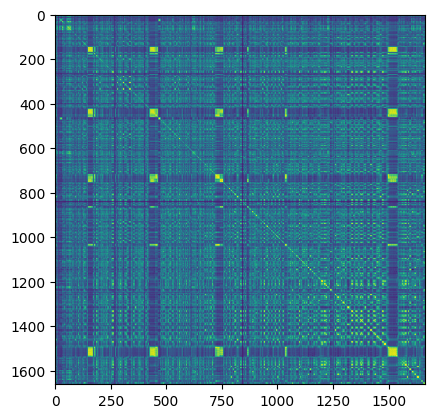

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(similarity_matrix)